# Bioinformatics Project - Computational Drug Discovery - Influenza virus A matrix protein M2  
Michael Bahchevanov  
***

## Modelling & Regression Comparison 🧪  
After we have generated the **molecular fingerprint** and normalized our values, in this notebook we will be comparing several ML algorithms and building regression models of the *Influenza virus A matrix protein M2* inhibitors/activators. We will be using the *lazypredict* library which is a convenient way of testing the most known, best performing algorithms with their default parameters. Afterwards, we will be checking the metrics by the means of **time**, **RMSE (Root Mean Squared Error)**, and **R-Squared (R$^2$)**.

### 1. Installing Libraries and Tooling 🔧  
We will be installing the *lazypredict* library for ML regression comparison, we will also be using *sklearn* for their general ML utilities, *seaborn* for visualization of the results, *numpy* for computation, and *pandas* for data wrangling and loading.

In [1]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(style='whitegrid')

np.random.seed(42)

/home/mykull/miniconda3/envs/bioinformatics/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Loading in the data 📂  
Now we will be loading in our fingerprinted data.

In [3]:
df = pd.read_csv('./data/influenza_virus_A_matrix_M2_protein_08_morgan_matrix_fingerprint.csv')
df.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
2 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
3 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
4 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

Now, we will be separating the ***X*** and ***Y*** variables for modelling.

In [4]:
X = df.drop('pEC50', axis=1)
y = df['pEC50']

### 3. Data Pre-processing 🔨  
We will be removing the low variance features. For this selection, we will be using *sklearn's* `VarianceThreshold` transformer.

In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
X.shape

(47, 2048)

In [7]:
selection = VarianceThreshold(threshold=(.8 * (1 -.8)))
X = selection.fit_transform(X)
X.shape

(47, 44)

We can see that from the *Morgan bit vector's* 2048 features we are left with 44.  
Now we will be splitting the data into training and testing via *sklearn's* `train_test_split` in a 80/20 fashion.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, train_size=.8)

In [9]:
print(f'Dimensions of the training and testing sets:\nTraining: {X_train.shape},\nValidation: {X_test.shape}, \nTarget Testing:{y_train.shape}, \nTarget Validation:{y_test.shape}')

Dimensions of the training and testing sets:
Training: (37, 44),
Validation: (10, 44), 
Target Testing:(37,), 
Target Validation:(10,)


Before modelling, this is the overview of our data and how it is used:  
* **X_train** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the training set for the features  
* **X_test** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the testing set for the features  
* **y_train** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the training set for the independent variable
* **y_test** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the testing set for the independent variable  

### 4. Machine Learning Algorithms Comparison 📏

In [10]:
clf_train = LazyRegressor(verbose=7, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf_train.fit(X_train, X_train, y_train, y_train)
clf_test = LazyRegressor(verbose=7, ignore_warnings=True, custom_metric=None)
models_test, predictions_test = clf_test.fit(X_train, X_test, y_train, y_test)

 14%|█▍        | 6/42 [00:00<00:00, 58.08it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4356978560811806, 'Adjusted R-Squared': 3.5393596476346874, 'RMSE': 0.6560866108575946, 'Time taken': 0.023465633392333984}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5233523654651084, 'Adjusted R-Squared': 3.1449143554070123, 'RMSE': 0.6029815805954365, 'Time taken': 0.025928020477294922}
{'Model': 'BayesianRidge', 'R-Squared': 0.07959151745619752, 'Adjusted R-Squared': 5.1418381714471115, 'RMSE': 0.837906638188009, 'Time taken': 0.021838903427124023}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.690387696917266, 'Adjusted R-Squared': 2.393255363872303, 'RMSE': 0.48597556100944356, 'Time taken': 0.009810447692871094}
{'Model': 'DummyRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.009613752365112305}
{'Model': 'ElasticNet', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.010410785675048828}


 29%|██▊       | 12/42 [00:00<00:02, 12.59it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.5909309387207031}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.690387696917266, 'Adjusted R-Squared': 2.393255363872303, 'RMSE': 0.48597556100944356, 'Time taken': 0.010581254959106445}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.690387696917266, 'Adjusted R-Squared': 2.393255363872303, 'RMSE': 0.48597556100944356, 'Time taken': 0.0978543758392334}
{'Model': 'GammaRegressor', 'R-Squared': 0.22635972398702375, 'Adjusted R-Squared': 4.481381242058394, 'RMSE': 0.7682009862880033, 'Time taken': 0.01295161247253418}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.690387696916188, 'Adjusted R-Squared': 2.393255363877154, 'RMSE': 0.4859755610102897, 'Time taken': 0.012444496154785156}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.22608123535418467, 'Adjusted R-Squared': 4.482634440906169, 'RMSE': 0.7683392391684787, 'Time taken': 0.011463403701782227}


 36%|███▌      | 15/42 [00:01<00:01, 13.94it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6850766409633835, 'Adjusted R-Squared': 2.4171551156647744, 'RMSE': 0.49012602364695496, 'Time taken': 0.06630611419677734}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.0511624813079834}
{'Model': 'HuberRegressor', 'R-Squared': 0.5505232199710679, 'Adjusted R-Squared': 3.0226455101301943, 'RMSE': 0.5855432181984833, 'Time taken': 0.04133939743041992}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.10428912063109763, 'Adjusted R-Squared': 5.030698957160061, 'RMSE': 0.8265882917903004, 'Time taken': 0.012312650680541992}
{'Model': 'KernelRidge', 'R-Squared': -37.84786602844544, 'Adjusted R-Squared': 175.81539712800446, 'RMSE': 5.443633881511111, 'Time taken': 0.023579835891723633}
{'Model': 'Lars', 'R-Squared': 0.3582750383079354, 'Adjusted R-Squared': 3.8877623276142907, 'RMSE': 0.6996483128112044, 'Time taken': 0.020858049392700195}


 45%|████▌     | 19/42 [00:01<00:01, 17.34it/s]

{'Model': 'LarsCV', 'R-Squared': 0.31586421788461416, 'Adjusted R-Squared': 4.078611019519236, 'RMSE': 0.7223979047938155, 'Time taken': 0.0715184211730957}
{'Model': 'Lasso', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.019715070724487305}


 52%|█████▏    | 22/42 [00:01<00:01, 16.16it/s]

{'Model': 'LassoCV', 'R-Squared': 0.2317629189346383, 'Adjusted R-Squared': 4.457066864794127, 'RMSE': 0.7655136828022949, 'Time taken': 0.1820206642150879}
{'Model': 'LassoLars', 'R-Squared': 0.0, 'Adjusted R-Squared': 5.5, 'RMSE': 0.8733841875018746, 'Time taken': 0.013608694076538086}
{'Model': 'LassoLarsCV', 'R-Squared': 0.474053429867917, 'Adjusted R-Squared': 3.3667595655943736, 'RMSE': 0.633397198922291, 'Time taken': 0.05194854736328125}
{'Model': 'LassoLarsIC', 'R-Squared': 0.077506312265194, 'Adjusted R-Squared': 5.151221594806627, 'RMSE': 0.8388552489625286, 'Time taken': 0.017620563507080078}
{'Model': 'LinearRegression', 'R-Squared': 0.5655383014544517, 'Adjusted R-Squared': 2.9550776434549673, 'RMSE': 0.5756799085767689, 'Time taken': 0.011620759963989258}
{'Model': 'LinearSVR', 'R-Squared': 0.4464011569254662, 'Adjusted R-Squared': 3.491194793835402, 'RMSE': 0.6498347203064154, 'Time taken': 0.013303518295288086}


 64%|██████▍   | 27/42 [00:01<00:00, 18.57it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5111107219436334, 'Adjusted R-Squared': 3.20000175125365, 'RMSE': 0.6106756188587737, 'Time taken': 0.11289834976196289}
{'Model': 'NuSVR', 'R-Squared': 0.24128080481319725, 'Adjusted R-Squared': 4.414236378340613, 'RMSE': 0.7607568309191612, 'Time taken': 0.015378475189208984}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.31221249485447766, 'Adjusted R-Squared': 4.095043773154851, 'RMSE': 0.7243233165893863, 'Time taken': 0.015004158020019531}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.20036652648004039, 'Adjusted R-Squared': 4.598350630839818, 'RMSE': 0.7809995933456297, 'Time taken': 0.017507314682006836}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.3922573455193057, 'Adjusted R-Squared': 3.7348419451631245, 'RMSE': 0.6808715442375233, 'Time taken': 0.01237344741821289}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3817069557641789, 'Adjusted R-Squared': 3.7823186990611948, 'RMSE': 0.6867560676206638, 'Time taken

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5798360500718016, 'Adjusted R-Squared': 2.890737774676893, 'RMSE': 0.5661281086168707, 'Time taken': 0.1325376033782959}
{'Model': 'Ridge', 'R-Squared': 0.5370505333053592, 'Adjusted R-Squared': 3.0832726001258832, 'RMSE': 0.5942540070918436, 'Time taken': 0.01684880256652832}
{'Model': 'RidgeCV', 'R-Squared': 0.34358561430944357, 'Adjusted R-Squared': 3.953864735607504, 'RMSE': 0.7076106650900911, 'Time taken': 0.014769792556762695}
{'Model': 'SGDRegressor', 'R-Squared': 0.39291433220888883, 'Adjusted R-Squared': 3.73188550506, 'RMSE': 0.6805034241983401, 'Time taken': 0.012611150741577148}
{'Model': 'SVR', 'R-Squared': 0.24206122339274116, 'Adjusted R-Squared': 4.410724494732665, 'RMSE': 0.7603654730097309, 'Time taken': 0.010564327239990234}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5655383014544517, 'Adjusted R-Squared': 2.9550776434549673, 'RMSE': 0.5756799085767689, 'Time taken': 0.009983062744140625}
{'Model': 'Tweed

 14%|█▍        | 6/42 [00:00<00:00, 55.66it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.49039733691805387, 'Adjusted R-Squared': 1.3832450294932137, 'RMSE': 0.6384624821587876, 'Time taken': 0.0287017822265625}
{'Model': 'BaggingRegressor', 'R-Squared': -0.4968280934063336, 'Adjusted R-Squared': 1.3848986525902, 'RMSE': 0.6398384163681438, 'Time taken': 0.033440589904785156}
{'Model': 'BayesianRidge', 'R-Squared': -0.6245977371023361, 'Adjusted R-Squared': 1.4177537038263148, 'RMSE': 0.6665876621198901, 'Time taken': 0.011934280395507812}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.830439845665191, 'Adjusted R-Squared': 1.7278273888853346, 'RMSE': 0.8798554201581819, 'Time taken': 0.01002955436706543}
{'Model': 'DummyRegressor', 'R-Squared': -0.6874129861865812, 'Adjusted R-Squared': 1.433906196447978, 'RMSE': 0.6793522882847192, 'Time taken': 0.01062154769897461}
{'Model': 'ElasticNet', 'R-Squared': -0.6874129861865812, 'Adjusted R-Squared': 1.433906196447978, 'RMSE': 0.6793522882847192, 'Time taken': 0.01170444488525

 29%|██▊       | 12/42 [00:00<00:02, 12.73it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.6874129861865812, 'Adjusted R-Squared': 1.433906196447978, 'RMSE': 0.6793522882847192, 'Time taken': 0.5687415599822998}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.830439845665191, 'Adjusted R-Squared': 1.7278273888853346, 'RMSE': 0.8798554201581819, 'Time taken': 0.011196374893188477}
{'Model': 'ExtraTreesRegressor', 'R-Squared': -1.802894552401383, 'Adjusted R-Squared': 1.7207443134746412, 'RMSE': 0.8755636615817545, 'Time taken': 0.10271883010864258}
{'Model': 'GammaRegressor', 'R-Squared': -0.6560952046935444, 'Adjusted R-Squared': 1.4258530526354827, 'RMSE': 0.6730184946650182, 'Time taken': 0.013396263122558594}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -95.37692089943535, 'Adjusted R-Squared': 25.782636802711945, 'RMSE': 5.134177422961057, 'Time taken': 0.013777971267700195}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.6154882363847116, 'Adjusted R-Squared': 1.41541126078464, 'RMSE': 0.6647161782527709, 'Time tak

 48%|████▊     | 20/42 [00:01<00:01, 20.08it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -1.6283484909289272, 'Adjusted R-Squared': 1.6758610405245813, 'RMSE': 0.8478632720710041, 'Time taken': 0.04536032676696777}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.6874129861865812, 'Adjusted R-Squared': 1.433906196447978, 'RMSE': 0.6793522882847192, 'Time taken': 0.07295012474060059}
{'Model': 'HuberRegressor', 'R-Squared': -3.625497823956181, 'Adjusted R-Squared': 2.1894137261601605, 'RMSE': 1.1247696510532472, 'Time taken': 0.027421951293945312}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.8249603447746914, 'Adjusted R-Squared': 1.4692755172277776, 'RMSE': 0.7064982086654461, 'Time taken': 0.016011953353881836}
{'Model': 'KernelRidge', 'R-Squared': -118.62977346230852, 'Adjusted R-Squared': 31.76194174745076, 'RMSE': 5.720104846000164, 'Time taken': 0.01284646987915039}
{'Model': 'Lars', 'R-Squared': -9.970901311595739, 'Adjusted R-Squared': 3.821088908696047, 'RMSE': 1.7322297905771564, 'Time taken': 0.017

 57%|█████▋    | 24/42 [00:01<00:00, 18.29it/s]

{'Model': 'LassoCV', 'R-Squared': -0.6038762988132595, 'Adjusted R-Squared': 1.4124253339805524, 'RMSE': 0.6623229194112766, 'Time taken': 0.1842639446258545}
{'Model': 'LassoLars', 'R-Squared': -0.6874129861865812, 'Adjusted R-Squared': 1.433906196447978, 'RMSE': 0.6793522882847192, 'Time taken': 0.01173710823059082}
{'Model': 'LassoLarsCV', 'R-Squared': -0.8200129653634509, 'Adjusted R-Squared': 1.4680033339506016, 'RMSE': 0.7055399174824492, 'Time taken': 0.038162946701049805}
{'Model': 'LassoLarsIC', 'R-Squared': -0.5170485516769423, 'Adjusted R-Squared': 1.3900981990026422, 'RMSE': 0.6441456660973547, 'Time taken': 0.020450115203857422}
{'Model': 'LinearRegression', 'R-Squared': -3.063362529956981, 'Adjusted R-Squared': 2.0448646505603665, 'RMSE': 1.0542100079204657, 'Time taken': 0.014316082000732422}
{'Model': 'LinearSVR', 'R-Squared': -2.4717547474285952, 'Adjusted R-Squared': 1.8927369350530672, 'RMSE': 0.9744484476195229, 'Time taken': 0.0187225341796875}


 64%|██████▍   | 27/42 [00:01<00:00, 18.64it/s]

{'Model': 'MLPRegressor', 'R-Squared': -12.430601883665032, 'Adjusted R-Squared': 4.453583341513865, 'RMSE': 1.9166026615766611, 'Time taken': 0.11774063110351562}
{'Model': 'NuSVR', 'R-Squared': -0.7798371754471618, 'Adjusted R-Squared': 1.4576724165435557, 'RMSE': 0.6977092582215245, 'Time taken': 0.013425111770629883}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.8879781310120041, 'Adjusted R-Squared': 1.485480090831658, 'RMSE': 0.7185927459388923, 'Time taken': 0.01880621910095215}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.5610754328781278, 'Adjusted R-Squared': 1.4014193970258042, 'RMSE': 0.6534258231358636, 'Time taken': 0.019015073776245117}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.8720762374132285, 'Adjusted R-Squared': 1.7385338896205444, 'RMSE': 0.8863032277905806, 'Time taken': 0.011337995529174805}
{'Model': 'PoissonRegressor', 'R-Squared': -0.5263087139163669, 'Adjusted R-Squared': 1.3924793835784943, 'RMSE': 0.6461086284954458, 'Time

100%|██████████| 42/42 [00:01<00:00, 22.11it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.33900205299473885, 'Adjusted R-Squared': 1.3443148136272185, 'RMSE': 0.6051666275999201, 'Time taken': 0.12906622886657715}
{'Model': 'Ridge', 'R-Squared': -1.5732657370261678, 'Adjusted R-Squared': 1.6616969038067286, 'RMSE': 0.8389318211913033, 'Time taken': 0.026214122772216797}
{'Model': 'RidgeCV', 'R-Squared': -0.5264686677702561, 'Adjusted R-Squared': 1.3925205145694943, 'RMSE': 0.6461424830023055, 'Time taken': 0.022951602935791016}
{'Model': 'SGDRegressor', 'R-Squared': -0.751908831183765, 'Adjusted R-Squared': 1.4504908423043967, 'RMSE': 0.6922135558613179, 'Time taken': 0.02626967430114746}
{'Model': 'SVR', 'R-Squared': -0.9493464399852984, 'Adjusted R-Squared': 1.5012605131390768, 'RMSE': 0.7301782017730335, 'Time taken': 0.020565032958984375}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -3.063362529956981, 'Adjusted R-Squared': 2.0448646505603665, 'RMSE': 1.0542100079204657, 'Time taken': 0.02242732048034668}
{'Mode

Performance table of the training set (80% subset):

In [11]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,175.82,-37.85,5.44,0.02
LGBMRegressor,5.50,-0.00,0.87,0.02
DummyRegressor,5.50,0.00,0.87,0.01
ElasticNet,5.50,0.00,0.87,0.01
ElasticNetCV,5.50,0.00,0.87,0.59
LassoLars,5.50,0.00,0.87,0.01
Lasso,5.50,0.00,0.87,0.02
HistGradientBoostingRegressor,5.50,0.00,0.87,0.05
LassoLarsIC,5.15,0.08,0.84,0.02


Performance table of the test set (20% subset)

In [12]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,31.76,-118.63,5.72,0.01
GaussianProcessRegressor,25.78,-95.38,5.13,0.01
MLPRegressor,4.45,-12.43,1.92,0.12
Lars,3.82,-9.97,1.73,0.02
HuberRegressor,2.19,-3.63,1.12,0.03
TransformedTargetRegressor,2.04,-3.06,1.05,0.02
LinearRegression,2.04,-3.06,1.05,0.01
LinearSVR,1.89,-2.47,0.97,0.02
PassiveAggressiveRegressor,1.74,-1.87,0.89,0.01


Overall, from all the 41 regressors compared, the **Random Forest Regressor (RFR)** yields the best results with the lowest **RMSE** score and a **R$^{2}$** score of ≈ 0.7

### 5. Visualization of Model Performance

#### 5.1 Bar plot of **R$^{2}$** values:

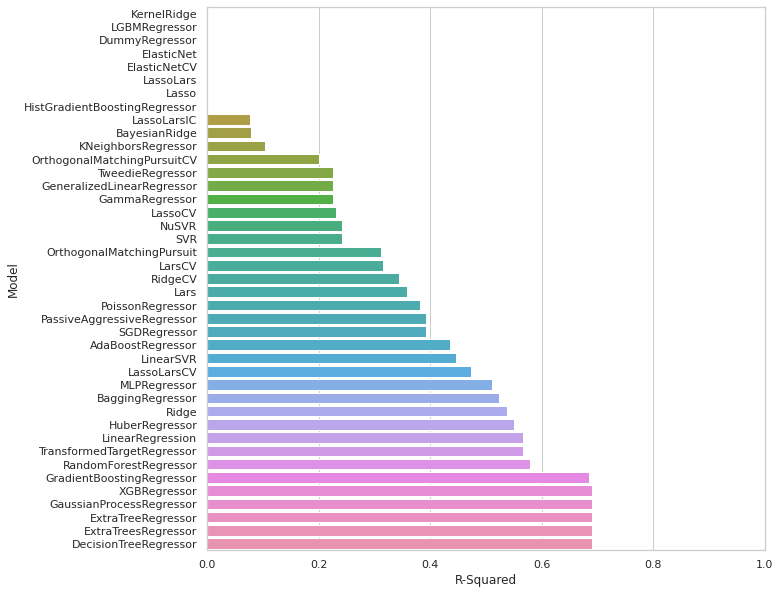

In [13]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=predictions_train.index, x='R-Squared', data=predictions_train)
ax.set(xlim=(0, 1))
plt.show()

#### 5.2 Bar plot of **RMSE** values:

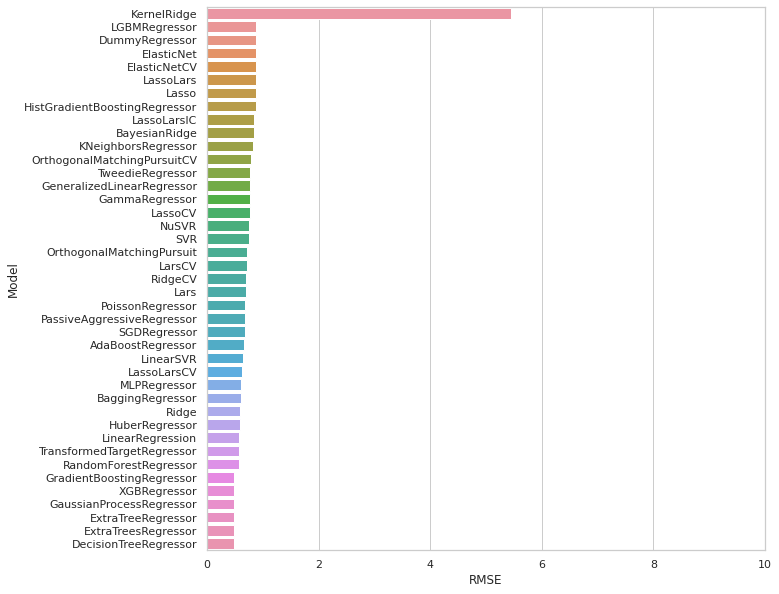

In [14]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=predictions_train.index, x='RMSE', data=predictions_train)
ax.set(xlim=(0, 10))
plt.show()

#### 5.3 Bar plot of **Calculation Time**:

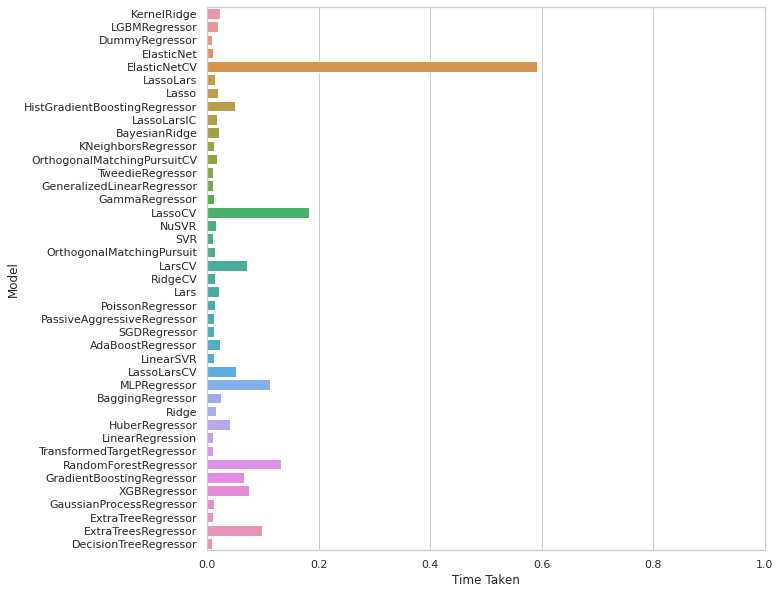

In [15]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=predictions_train.index, x='Time Taken', data=predictions_train)
ax.set(xlim=(0, 1))
plt.show()

#### 5.4 Interpretation of Visualizations  
Overall, we can see that from the models we have compared we can conclude that the worst performing model would be **Kernel Ridge** with a big error measurement and a low R$^{2}$ value. The best performing models would be a tie between **Gradient Boosting Regressor**, **XGB Regressor**, **Gaussian Process Regressor**, **Extra Tree Regressor**, **Extra Trees Regressor**, and **Decision Tree Regressor**, with the best time performance - **Decision Tree Regressor** and **Extra Tree Regressor**. Another point to mention is that, unfortunately, there are not many bioactive compounds that interact with the *M2 protein in Influenza virus A* which makes it difficult to train a model to recognize patterns, chemical space, and/or interactions.

*** 
### Overview
In this notebook we compared and visualized the results of the most commonly used regressors and landed on 2 regressors that yield the best results - **Decision Tree Regressor** and **Extra Tree Regressor**. Our next steps would be to look into optimizing and attempting for final results with these two regressors. We will also be looking into **RMT (Random Matrix Theory)** with the **decoy** set we have created.